In [31]:
# Mengimpor library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Memuat data (asumsi data sudah disiapkan dalam bentuk DataFrame)
data = pd.read_csv('corrected_data_kuesioner.csv', sep=';')  # Ganti dengan path file CSV yang benar

# Menampilkan 5 baris pertama dari data
print(data.head())


  Responden     Aplikasi  KP1  KP2  KP3  KP4  KP5  KP6  KP7  KP8  KP9  KP10  \
0        R1      Spotify    3    3    3    3    3    2    3    4    3     3   
1        R2      Spotify    2    4    4    4    4    4    4    3    3     4   
2        R3  Apple Music    3    4    4    3    3    3    4    4    2     3   
3        R4      Spotify    4    4    3    3    4    3    3    4    4     4   
4        R5      Spotify    4    4    4    4    4    4    4    4    4     4   

   Label  
0      1  
1      1  
2     -1  
3      1  
4      1  


Jumlah data latih: 168 (70.00%)
Jumlah data uji: 72 (30.00%)


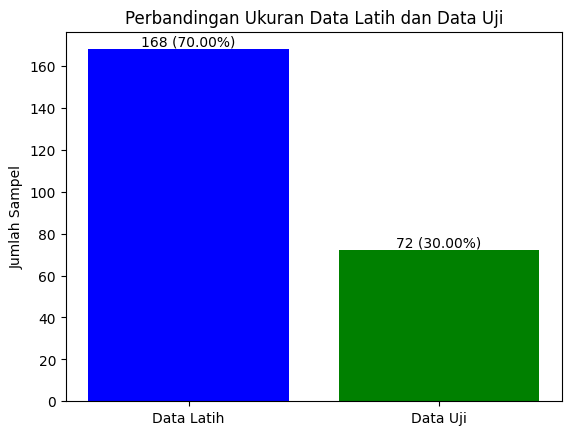

In [32]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Misalkan 'data' adalah DataFrame yang sudah diimpor
X = data.drop('Label', axis=1)  # Fitur
y = data['Label']  # Target

# Membagi data 70% untuk data latih dan 30% untuk data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran data latih dan data uji
train_size = X_train.shape[0]
test_size = X_test.shape[0]
total_size = X.shape[0]

train_percent = (train_size / total_size) * 100
test_percent = (test_size / total_size) * 100

# Menampilkan hasil jumlah dan persentase
print(f"Jumlah data latih: {train_size} ({train_percent:.2f}%)")
print(f"Jumlah data uji: {test_size} ({test_percent:.2f}%)")

# Visualisasi diagram batang ukuran data latih dan data uji
sizes = [train_size, test_size]
labels = ['Data Latih', 'Data Uji']

fig, ax = plt.subplots()

bars = ax.bar(labels, sizes, color=['blue', 'green'])
ax.set_title('Perbandingan Ukuran Data Latih dan Data Uji')
ax.set_ylabel('Jumlah Sampel')

# Menambahkan jumlah dan persentase di atas diagram batang
for bar, size, percent in zip(bars, sizes, [train_percent, test_percent]):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{size} ({percent:.2f}%)',
            ha='center', va='bottom', fontsize=10)

plt.show()


In [33]:
# Menyimpan data latih
train_data = pd.DataFrame(X_train, columns=['KP1', 'KP2', 'KP3', 'KP4', 'KP5', 'KP6', 'KP7', 'KP8', 'KP9', 'KP10'])
train_data['Label'] = y_train
train_data.to_csv('data_latih.csv', index=False)

# Menyimpan data uji
test_data = pd.DataFrame(X_test, columns=['KP1', 'KP2', 'KP3', 'KP4', 'KP5', 'KP6', 'KP7', 'KP8', 'KP9', 'KP10'])
test_data['Label'] = y_test
test_data.to_csv('data_uji.csv', index=False)


In [34]:
# Mengimpor library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Memuat data
data_latih = pd.read_csv('data_latih.csv')
data_uji = pd.read_csv('data_uji.csv')

# Memisahkan fitur dan label dari data latih dan data uji
X_train = data_latih.drop(columns='Label')
y_train = data_latih['Label']
X_test = data_uji.drop(columns='Label')
y_test = data_uji['Label']

In [35]:
# Membuat dan melatih model SVM Linear
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


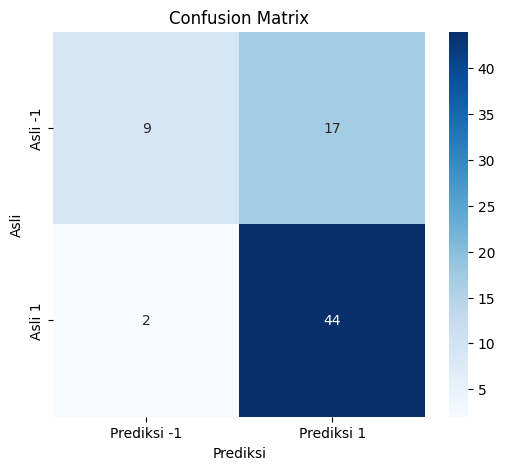

Akurasi: 0.7361111111111112
Precision: 0.7213114754098361
Recall: 0.9565217391304348
F1-Score: 0.822429906542056

Classification Report:
               precision    recall  f1-score   support

    Kelas -1       0.82      0.35      0.49        26
     Kelas 1       0.72      0.96      0.82        46

    accuracy                           0.74        72
   macro avg       0.77      0.65      0.65        72
weighted avg       0.76      0.74      0.70        72

SVM Akurasi: 0.7361111111111112


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Asumsikan model SVM sudah dilatih dan siap digunakan
prediksi_svm = model_svm.predict(X_test)

# Menghitung confusion matrix
cm_svm = confusion_matrix(y_test, prediksi_svm)

# Membuat plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi -1', 'Prediksi 1'], yticklabels=['Asli -1', 'Asli 1'])
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix')
plt.show()

# Mencetak metrik evaluasi
akurasi_svm = accuracy_score(y_test, prediksi_svm)
precision_svm = precision_score(y_test, prediksi_svm)
recall_svm = recall_score(y_test, prediksi_svm)
f1_svm = f1_score(y_test, prediksi_svm)

print(f"Akurasi: {akurasi_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")

# Menampilkan classification report
print("\nClassification Report:\n", classification_report(y_test, prediksi_svm, target_names=['Kelas -1', 'Kelas 1']))

# Menampilkan akurasi SVM secara langsung
print(f"SVM Akurasi: {akurasi_svm}")
